In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
import os
os.chdir("../")

In [3]:
df = pd.read_csv("dataset/results.csv")
df.columns = ["price"]
logs = pd.read_csv("dataset/logs.log", sep = ";", header=None)
logs.columns = ["Message", "Variable", "Datetime"]

In [4]:
df.head()

,price
0,12.667195
1,14.132531
2,12.869995
3,12.969216
4,13.991106


In [5]:
logs.head()

,Message,Variable,Datetime
0,WARNING:root:KEY_DUPLICATION,['id'],2024-11-14 21:58:52.260841
1,WARNING:root:NULL_TOLERANCE,area_total,2024-11-14 22:01:05.352273
2,WARNING:root:19678 CASES OUT OF BOUNDS,quartos,2024-11-14 22:04:34.895204
3,WARNING:root:KEY_DUPLICATION,['id'],2024-11-14 22:08:55.983341
4,WARNING:root:19678 CASES OUT OF BOUNDS,quartos,2024-11-14 22:08:55.989361


In [6]:
logs['Message'] = logs['Message'].str.replace(r'WARNING:root:', '', regex=True)
logs.head()

,Message,Variable,Datetime
0,KEY_DUPLICATION,['id'],2024-11-14 21:58:52.260841
1,NULL_TOLERANCE,area_total,2024-11-14 22:01:05.352273
2,19678 CASES OUT OF BOUNDS,quartos,2024-11-14 22:04:34.895204
3,KEY_DUPLICATION,['id'],2024-11-14 22:08:55.983341
4,19678 CASES OUT OF BOUNDS,quartos,2024-11-14 22:08:55.989361


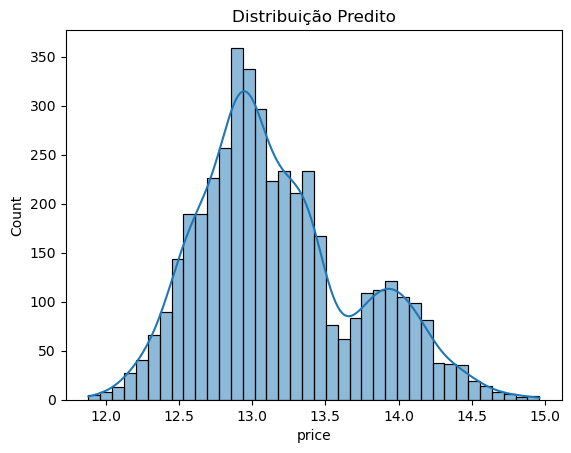

In [8]:
sns.histplot(data=df, x="price", kde=True).set_title("Distribuição Predito")
plt.savefig('assets/chart.png')

In [11]:
page_title_text='Acompanhamento do processo de predição'
title_text = 'Acompanhamento do processo de predição'
text = f'Acompanhamento do modelo diário - {datetime.now().date()}'
logs_text = 'Logs de acompanhamento do processo'

html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src="chart.png">
            <h2>{logs_text}</h2>
            {logs.head(3).to_html()}
        </body>
    </html>
    '''
with open('assets/html_report.html', 'w') as f:
    f.write(html)